# Importing libraries

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Loading dataset

In [2]:
# Loading dataset
dataset = pd.read_csv('dataset/dataset.csv')

# Exploratory Data Analysis (EDA)

In [3]:
dataset.head(10)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [4]:
dataset.tail(10)

,Category,Resume
952,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
953,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
954,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...
955,Testing,â¢ Good logical and analytical skills â¢ Pos...
956,Testing,COMPUTER PROFICIENCY â¢ Basic: MS-Office (Pow...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [5]:
#Unique Categories
categories = dataset['Category'].unique()
categories

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [6]:
# Total count per category
count_per_category = dataset['Category'].value_counts()
count_per_category

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

In [7]:
#Total categories 
total_categories = count_per_category.count()
print(f'Total categories: {total_categories}')

Total categories: 25


# Data Visualization

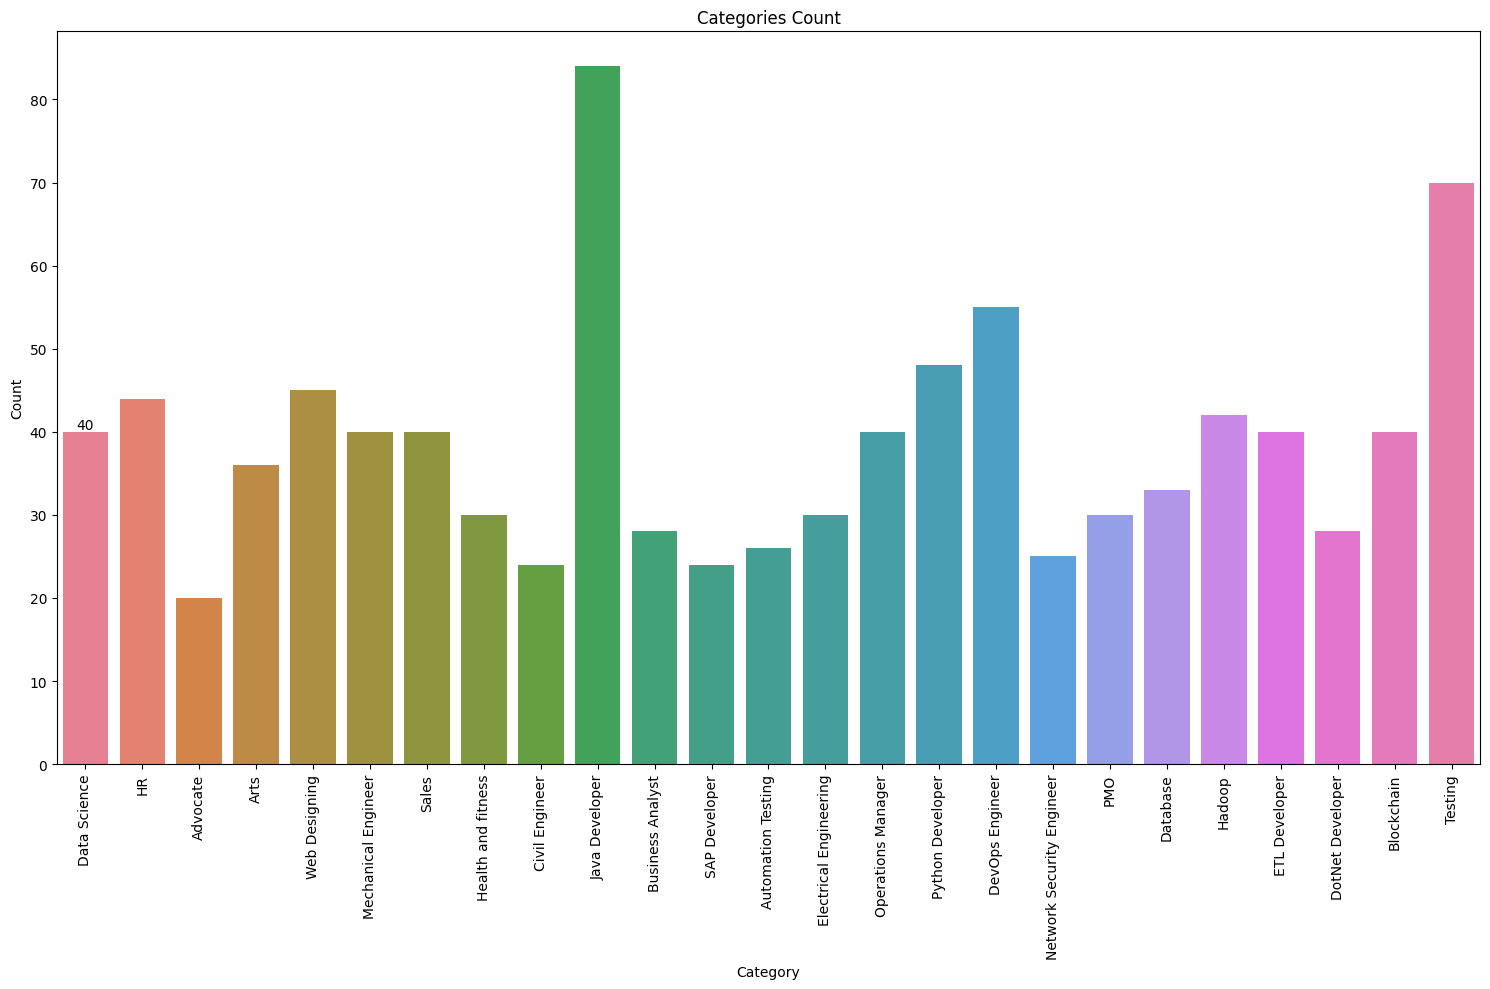

In [8]:
plt.figure(figsize=(15,10))
ax = sns.countplot(data=dataset, x="Category", hue="Category", palette="husl", legend=False )
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Categories Count')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

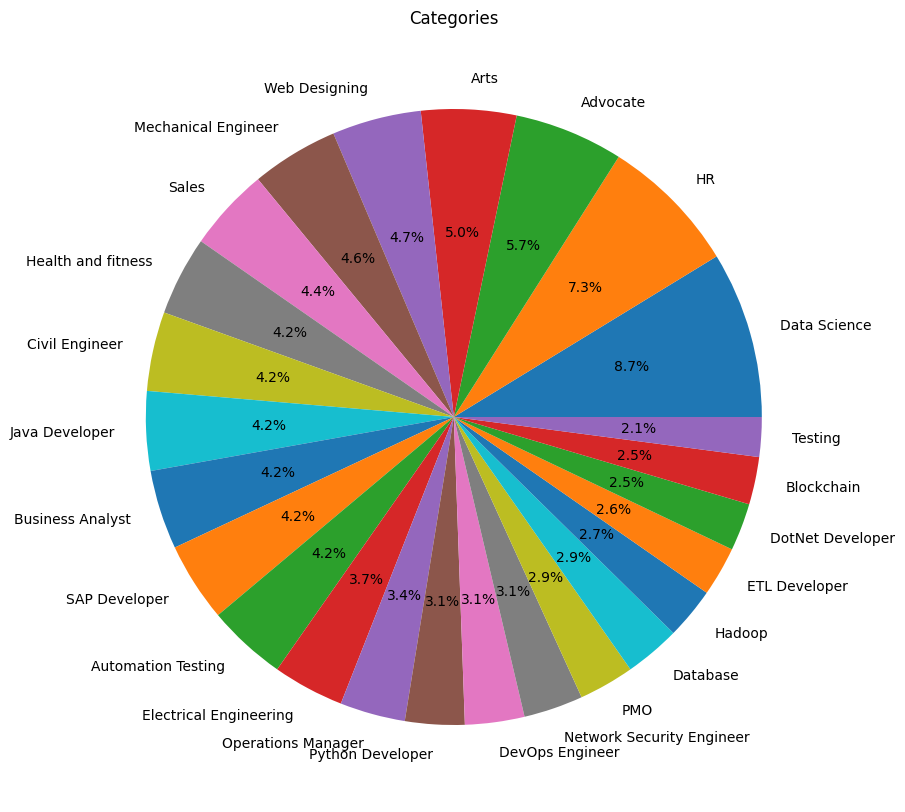

In [9]:
plt.figure(figsize=(10,10))
plt.pie(count_per_category,labels=categories,autopct='%1.1f%%')
plt.title('Categories')
plt.show()

# Data Preprocessing and Cleaning

In [23]:
# Removing all special characters and all while preserving any urls and emails
pattern = re.compile(r'(https?://[^\s]+|www\.[^\s]+|[\w\.-]+@[\w\.-]+\.\w+)|[^\w\s]')

def preprocess(text):
    data = pattern.sub(lambda m: m.group(1) if m.group(1) else ' ', text)
    data = re.sub(r'\s+', ' ', data).strip().replace('_',' ')
    data = re.sub(r'(?<=[\w/])([.,;\'")]+)(\s|$)', r'\2', data)
    return data

In [44]:
dataset['Resume'] = dataset['Resume'].apply(lambda x: preprocess(x))
dataset.head(10)

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills â R â Python â SAP HANA â Tableau â SAP...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...
5,Data Science,SKILLS C Basics IOT Python MATLAB Data Science...
6,Data Science,Skills â Python â Tableau â Data Visualization...
7,Data Science,Education Details B Tech Rayat and Bahra Insti...
8,Data Science,Personal Skills â Ability to quickly grasp tec...
9,Data Science,Expertise â Data and Quantitative Analysis â D...


In [45]:
dataset['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM NaÃ ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating th

# Labels Encodings to Numbers

In [49]:
encoder = LabelEncoder()
dataset['Encoded_Labels'] = encoder.fit_transform(dataset['Category'])
dataset.head(10)

,Category,Resume,Encoded_Labels,Encoded_labels
0,Data Science,Skills Programming Languages Python pandas num...,6,6
1,Data Science,Education Details May 2013 to May 2017 B E UIT...,6,6
2,Data Science,Areas of Interest Deep Learning Control System...,6,6
3,Data Science,Skills â R â Python â SAP HANA â Tableau â SAP...,6,6
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...,6,6
5,Data Science,SKILLS C Basics IOT Python MATLAB Data Science...,6,6
6,Data Science,Skills â Python â Tableau â Data Visualization...,6,6
7,Data Science,Education Details B Tech Rayat and Bahra Insti...,6,6
8,Data Science,Personal Skills â Ability to quickly grasp tec...,6,6
9,Data Science,Expertise â Data and Quantitative Analysis â D...,6,6


In [50]:
dataset['Encoded_Labels'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

# Vectorization and removing Stopwords

In [61]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidvectors = vectorizer.fit_transform(dataset['Resume'])
pd.DataFrame(tfidvectors.toarray(), columns=vectorizer.get_feature_names_out()).tail(10)

,000,01,017,02,03,04,04th,05,050education,06th,...,zd,zenoss,zensar,zero,zhypility,zone,zookeeper,zz,ã¼,ã¼â
952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Training Model

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(tfidvectors, dataset['Enc'])